In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow


Epoch 1/50
51/51 [==============================] - 8s 75ms/step - loss: 0.0148
Epoch 2/50
51/51 [==============================] - 3s 64ms/step - loss: 0.0028
Epoch 3/50
51/51 [==============================] - 4s 74ms/step - loss: 0.0025
Epoch 4/50
51/51 [==============================] - 7s 129ms/step - loss: 0.0029
Epoch 5/50
51/51 [==============================] - 4s 80ms/step - loss: 0.0022
Epoch 6/50
51/51 [==============================] - 3s 66ms/step - loss: 0.0026
Epoch 7/50
51/51 [==============================] - 4s 72ms/step - loss: 0.0021
Epoch 8/50
51/51 [==============================] - 3s 64ms/step - loss: 0.0020
Epoch 9/50
51/51 [==============================] - 3s 65ms/step - loss: 0.0021
Epoch 10/50
51/51 [==============================] - 4s 74ms/step - loss: 0.0020
Epoch 11/50
51/51 [==============================] - 3s 64ms/step - loss: 0.0019
Epoch 12/50
51/51 [==============================] - 3s 66ms/step - loss: 0.0017
Epoch 13/50
51/51 [=================

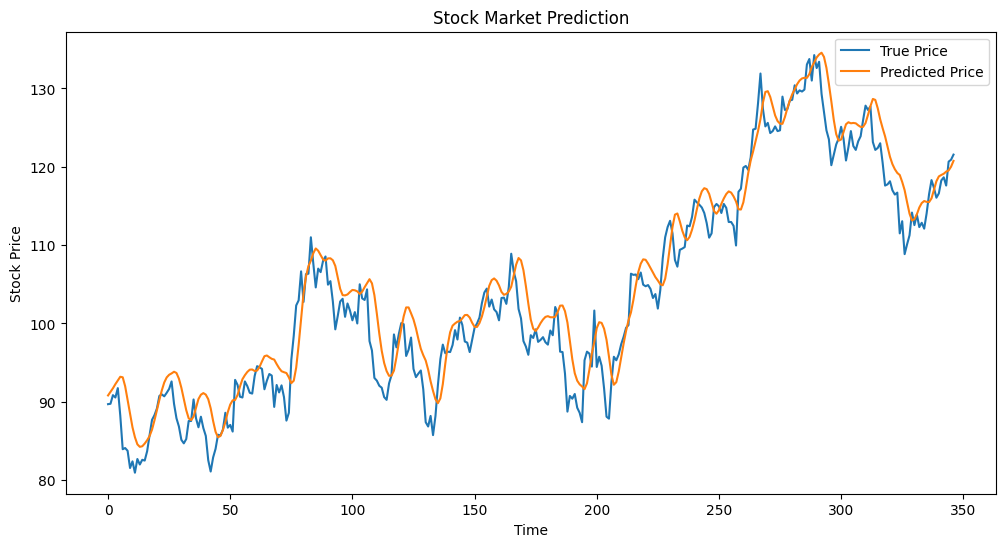

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

data_url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'  # Replace this with the actual URL of your dataset

# Load the dataset from the URL
data = pd.read_csv(data_url)


data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_dataset(data_scaled, time_steps)

# Split the data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)


y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Stock Market Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
